In [2]:
import numpy as np
import matplotlib.pyplot as plt

from dataUsed import download_prices, compute_log_returns, estimate_mu_cov
from riskMc import simulate_correlated_returns, portfolio_pnl, summarize_risk
from stress import stress_volatility, stress_correlation


In [ ]:
tickers = ["SPY", "QQQ", "IWM"]
weights = [0.5, 0.3, 0.2]

portfolio_value = 1_000_000
alpha = 0.05
n_sims = 200_000


In [4]:
prices = download_prices(tickers, start="2019-01-01")
returns = compute_log_returns(prices)

mu, cov = estimate_mu_cov(returns)

returns.describe()


Ticker,IWM,QQQ,SPY
count,1779.000000,1779.000000,1779.000000
mean,0.000419,0.000806,0.000632
std,0.016027,0.015220,0.012437
min,-0.142335,-0.127592,-0.115887
25%,-0.007975,-0.005989,-0.004255
50%,0.000854,0.001442,0.000984
75%,0.009581,0.008695,0.006596
max,0.087545,0.113356,0.099863


In [5]:
sim_returns = simulate_correlated_returns(mu, cov, n_sims=n_sims)
pnl = portfolio_pnl(sim_returns, weights, portfolio_value)

summary = summarize_risk(pnl, alpha)
summary


{'Expected PnL': np.float64(549.6066622703552),
 'PnL Volatility': np.float64(14297.979329524429),
 'Prob(Loss)': np.float64(0.48308),
 'VaR 95%': np.float64(23062.430685366184),
 'CVaR 95%': np.float64(28992.963559823984)}

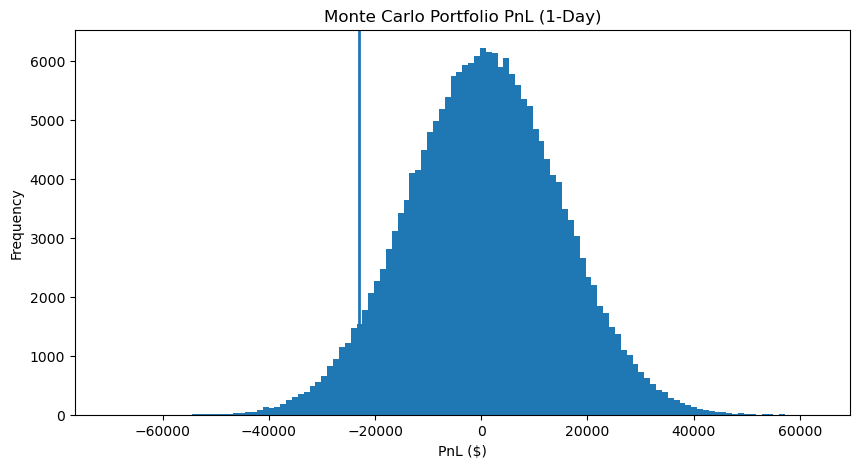

VaR (positive loss): 23062.430685366184


In [6]:
q = np.quantile(pnl, alpha)

plt.figure(figsize=(10,5))
plt.hist(pnl, bins=120)
plt.axvline(q, linewidth=2)
plt.title("Monte Carlo Portfolio PnL (1-Day)")
plt.xlabel("PnL ($)")
plt.ylabel("Frequency")
plt.show()

print("VaR (positive loss):", -q)


In [7]:
# Volatility stress
cov_vol = stress_volatility(cov, multiplier=1.5)
r_vol = simulate_correlated_returns(mu, cov_vol, n_sims=n_sims)
pnl_vol = portfolio_pnl(r_vol, weights, portfolio_value)

# Correlation stress
cov_corr = stress_correlation(cov, corr_bump=0.2)
r_corr = simulate_correlated_returns(mu, cov_corr, n_sims=n_sims)
pnl_corr = portfolio_pnl(r_corr, weights, portfolio_value)

{
    "Base": summarize_risk(pnl, alpha),
    "Vol +50%": summarize_risk(pnl_vol, alpha),
    "Corr +0.2": summarize_risk(pnl_corr, alpha)
}


{'Base': {'Expected PnL': np.float64(549.6066622703552),
  'PnL Volatility': np.float64(14297.979329524429),
  'Prob(Loss)': np.float64(0.48308),
  'VaR 95%': np.float64(23062.430685366184),
  'CVaR 95%': np.float64(28992.963559823984)},
 'Vol +50%': {'Expected PnL': np.float64(535.5780644535355),
  'PnL Volatility': np.float64(21446.968994286643),
  'Prob(Loss)': np.float64(0.488465),
  'VaR 95%': np.float64(34882.477957001276),
  'CVaR 95%': np.float64(43778.27726868797)},
 'Corr +0.2': {'Expected PnL': np.float64(552.7268187107964),
  'PnL Volatility': np.float64(15005.952166082827),
  'Prob(Loss)': np.float64(0.48484),
  'VaR 95%': np.float64(24223.378645278797),
  'CVaR 95%': np.float64(30462.92654974654)}}